<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/home_tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# sentiment analysis
# home tester club

library(dplyr)
library(tidyr)
library(tidytext)
library(wordcloud)
library(igraph)
library(ggraph)


Attaching package: ‘igraph’


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [73]:
load("scrape TS.rda")
str(data)
stop = readLines("https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/stopwords-id.txt")

'data.frame':	165 obs. of  4 variables:
 $ produk   : chr  "Tropicana Slim Sweet Orange" "Tropicana Slim Sweet Orange" "Tropicana Slim Sweet Orange" "Tropicana Slim Sweet Orange" ...
 $ rate     : chr  "4,9 dari 165 Review & Komentar" "4,9 dari 165 Review & Komentar" "4,9 dari 165 Review & Komentar" "4,9 dari 165 Review & Komentar" ...
 $ deskripsi: chr  "Minuman serbuk instan rasa jeruk yang tinggi serta & 7 vitamin" "Minuman serbuk instan rasa jeruk yang tinggi serta & 7 vitamin" "Minuman serbuk instan rasa jeruk yang tinggi serta & 7 vitamin" "Minuman serbuk instan rasa jeruk yang tinggi serta & 7 vitamin" ...
 $ komen    : chr  "Minuman serbuk rasa jeruk yang manisnya cocok untuk penderita diabetes aman pokoknya" "Saya adalah orang yang mengutamakan kesehatan, pingin manis tapi tetap segar saya biasa gunakan tropicana slim "| __truncated__ "Suka banget dengan minuman ini, manisnya pas. Buat aku yg nggak suka manis dan menghindarinya yg namanya kalori"| __truncated__ "Minumam ini co

Warning message in readLines("https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/stopwords-id.txt"):
“incomplete final line found on 'https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/stopwords-id.txt'”


In [74]:
data_komen = data.frame(
  id = c(1:length(data$komen)),
  komen = tolower(data$komen)
)

data_komen =
  data_komen %>%
  unnest_tokens("words",komen) %>%
  filter(!words %in% stop) %>%
  rowwise %>%
  mutate(len = length(unlist(strsplit(words,split = "")))) %>%
  filter(len > 3) %>%
  ungroup %>%
  group_by(id) %>%
  summarise(komen = paste(words,collapse = " ")) %>%
  ungroup()

str(data_komen)

`summarise()` ungrouping output (override with `.groups` argument)



tibble [165 × 2] (S3: tbl_df/tbl/data.frame)
 $ id   : int [1:165] 1 2 3 4 5 6 7 8 9 10 ...
 $ komen: chr [1:165] "minuman serbuk jeruk manisnya cocok penderita diabetes aman pokoknya" "orang mengutamakan kesehatan pingin manis segar tropicana slim menjaga kesehatan pandemi" "suka banget minuman manisnya nggak suka manis menghindarinya namanya kalori cocok banget" "minumam cocok diet kaya gini pnya body over weight manfaat nyaa keren rasanyaa dijamin suka yukkk dicoba" ...


In [75]:
wc = 
  data_komen %>% 
  unnest_tokens("words",komen) %>%
  group_by(words) %>%
  count(sort = T) %>%
  ungroup()

wc

words,n
<chr>,<int>
banget,79
gula,65
minuman,59
enak,58
cocok,53
diet,51
manis,48
tropicana,44
slim,41


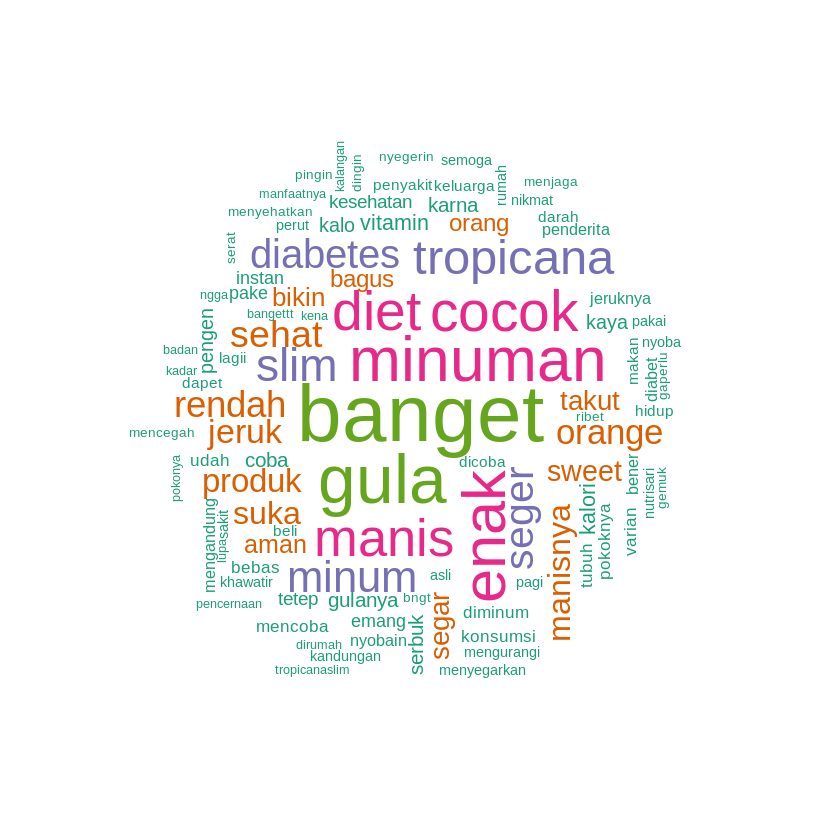

In [76]:
wordcloud(words = wc$words, 
          freq = wc$n, 
          min.freq = 0,
          max.words=100, 
          random.order=FALSE,
          rot.per = .25,
          colors=brewer.pal(5, "Dark2"))

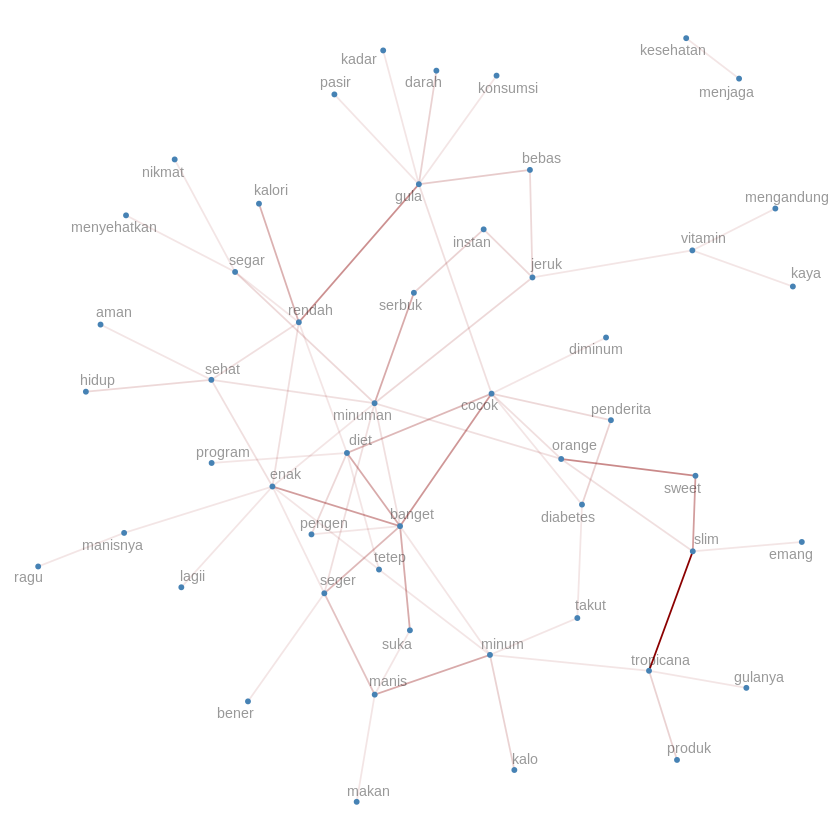

In [79]:
# bigrams
data_komen %>%
  unnest_tokens("bigram",komen,token = "ngrams",n = 2) %>%
  count(bigram,sort=T) %>% 
  filter(n>2) %>% 
  separate(bigram,into=c('word1','word2'),sep=' ') %>%
  graph_from_data_frame() %>%
  ggraph(layout = 'fr') +
  geom_edge_link(aes(edge_alpha=n),
                 show.legend = F,
                 color='darkred') +
  geom_node_point(size=1,color='steelblue') +
  geom_node_text(aes(label=name),alpha=0.4,size=3,repel = T) +
  theme_void()